# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [ ]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
x, y = mnist["data"], mnist["target"]

#### peek at one digit

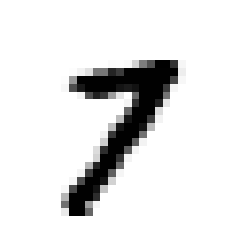

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [ ]:
# CODE HERE


array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance 

In [ ]:
# CODE HERE


array([[-37296.18207427, -16492.49425068, -12828.50505655,
         -6944.5348217 , -22748.82994809, -12191.13411648,
        -41100.70076137,   8379.10384634, -11199.35355947,
         -4072.62874998]])

#### find highest score 

In [ ]:
# CODE HERE


7

#### list the target classes

In [ ]:
# CODE HERE


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [ ]:
# CODE HERE
# if you got stuck use GOOGLE


'7'

#### Force ScikitLearn to use one-versus-one

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# CODE HERE


array(['7'], dtype=object)

#### find how many classifier OvO used

In [ ]:
# CODE HERE


45

#### Train  RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
# CODE HERE


array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [ ]:
forest_clf.predict_proba([some_digit])

#### Find accurcy using cross validation score ()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# CODE HERE


array([0.8796 , 0.87125, 0.85715])

#### to get better accurcy try scaling input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# CODE HERE


C:\Users\H4C-M\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.89895, 0.9019 , 0.9008 ])

## Error Analysis

#### Take a look at the confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
# CODE HERE


C:\Users\H4C-M\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5593,    0,   24,    5,    7,   41,   37,    5,  210,    1],
       [   1, 6424,   48,   21,    2,   39,    4,    9,  185,    9],
       [  22,   26, 5262,   93,   67,   23,   64,   35,  357,    9],
       [  25,   18,  123, 5257,    2,  200,   28,   41,  369,   68],
       [   7,   16,   50,   10, 5221,   10,   37,   22,  318,  151],
       [  29,   18,   36,  158,   49, 4463,   80,   17,  512,   59],
       [  28,   18,   50,    2,   39,   88, 5551,    9,  133,    0],
       [  18,   11,   50,   27,   53,   14,    4, 5714,  178,  196],
       [  19,   60,   47,   95,    3,  119,   33,    8, 5429,   38],
       [  21,   23,   28,   59,  121,   30,    1,  177,  370, 5119]],
      dtype=int64)

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

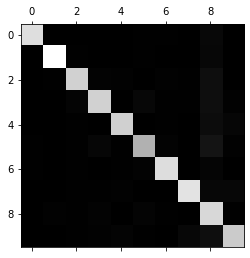

In [ ]:
# CODE HERE


#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

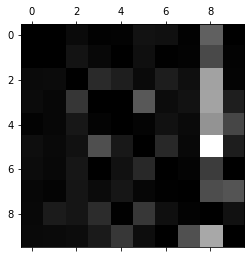

In [ ]:
# CODE HERE


In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

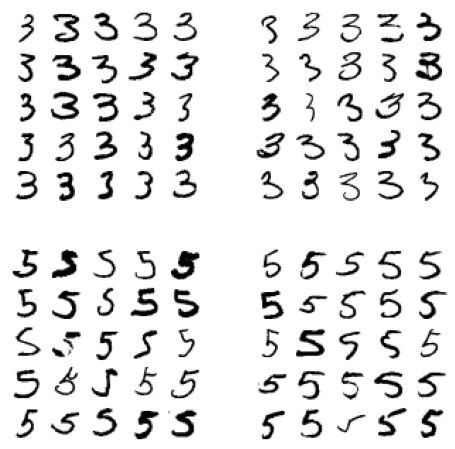

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [ ]:
# CODE HERE


array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

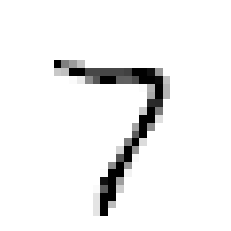

In [ ]:
# CODE HERE


# Congrats you've finished your first classification Project🥳 !
# #shAI_Club